                                        Elevvo.tech                                                   
                            Machine learning Internship Tasks                                
                                    Due Date: 25th August 2025                                                 

---

                                  Muhammad Usman Fakhar                                                               
                                Machine learning tracks                                                    
                                                                                          

---

In [1]:
2+2

4

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
import pandas as pd

# Load the CSV files
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Display the first few rows of each to understand the structure
features.head()



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:

train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
features.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis =1 , inplace = True )


In [8]:
merged_df = features.merge(stores, on='Store', how='left')
merged_df

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,NaN,NaN,False,B,118221


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           7605 non-null   float64
 5   Unemployment  7605 non-null   float64
 6   IsHoliday     8190 non-null   bool   
 7   Type          8190 non-null   object 
 8   Size          8190 non-null   int64  
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 520.0+ KB


In [10]:
train_merged = train.merge(merged_df, on=['Store', 'Date', 'IsHoliday'], how='left')

In [11]:
test_merged = test.merge(merged_df, on=['Store', 'Date', 'IsHoliday'], how='left')

In [12]:
df = train_merged
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,B,118221


In [13]:
df['IsHoliday'] = df['IsHoliday'].map({True: 1, False: 0})


In [14]:
df['Type'].value_counts()


Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [15]:
df['Type'] = df['Type'].map({'A': 1, 'B': 2,'C' :3})


In [16]:
df['Date']=pd.to_datetime(df['Date'])


In [17]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [18]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,1,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,1,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,1,151315
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,1,151315
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,1,151315


In [19]:
df['day']=df.Date.dt.day


In [20]:
df['month']=df.Date.dt.month


In [21]:
df['year']=df.Date.dt.year


In [22]:
# df['monthYear']=df.Date.dt.to_period('M')

In [23]:
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,month,year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,1,151315,5,2,2010
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,1,151315,12,2,2010
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,1,151315,19,2,2010
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,1,151315,26,2,2010
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,1,151315,5,3,2010


In [24]:
df.set_index(df['Date'],inplace=True)


In [25]:
df.drop( 'Date',axis=1 , inplace =True)


In [26]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,day,month,year
Date,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,1,151315,5,2,2010
2010-02-12,1,1,46039.49,1,38.51,2.548,211.242170,8.106,1,151315,12,2,2010
2010-02-19,1,1,41595.55,0,39.93,2.514,211.289143,8.106,1,151315,19,2,2010
2010-02-26,1,1,19403.54,0,46.63,2.561,211.319643,8.106,1,151315,26,2,2010
2010-03-05,1,1,21827.90,0,46.50,2.625,211.350143,8.106,1,151315,5,3,2010


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  int64  
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   Type          421570 non-null  int64  
 9   Size          421570 non-null  int64  
 10  day           421570 non-null  int32  
 11  month         421570 non-null  int32  
 12  year          421570 non-null  int32  
dtypes: float64(5), int32(3), int64(5)
memory usage: 40.2 MB


In [29]:
df.describe().T  # T for transpose

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
IsHoliday,421570.0,0.070358,0.255750,0.000,0.000000,0.00000,0.000000,1.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
Type,421570.0,1.589912,0.666337,1.000,1.000000,1.00000,2.000000,3.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000


                                                        Visualization                                                                       

<Axes: >

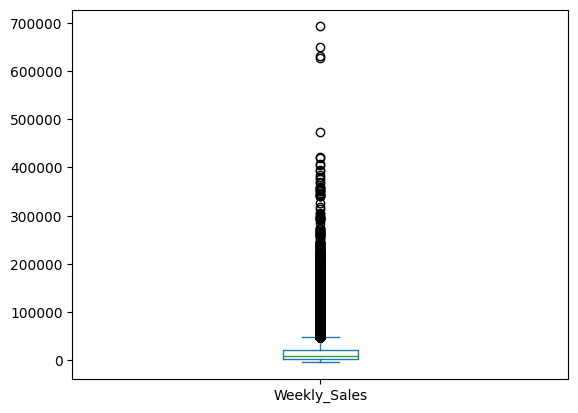

In [30]:
df['Weekly_Sales'].plot(kind='box')

In [31]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get rows where outliers exist
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = {
        "Total Outliers": outlier_rows.shape[0],
        "Percentage": round(100 * outlier_rows.shape[0] / df.shape[0], 2)
    }


pd.DataFrame(outliers).T.sort_values(by="Total Outliers", ascending=False)


,Total Outliers,Percentage
Weekly_Sales,35521.0,8.43
Unemployment,32114.0,7.62
IsHoliday,29661.0,7.04
Temperature,69.0,0.02
Dept,0.0,0.00
Store,0.0,0.00
Fuel_Price,0.0,0.00
CPI,0.0,0.00
Type,0.0,0.00
Size,0.0,0.00


In [32]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Weekly_Sales'] >= lower) & (df['Weekly_Sales'] <= upper)]


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 386049 entries, 2010-02-05 to 2012-10-26
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         386049 non-null  int64  
 1   Dept          386049 non-null  int64  
 2   Weekly_Sales  386049 non-null  float64
 3   IsHoliday     386049 non-null  int64  
 4   Temperature   386049 non-null  float64
 5   Fuel_Price    386049 non-null  float64
 6   CPI           386049 non-null  float64
 7   Unemployment  386049 non-null  float64
 8   Type          386049 non-null  int64  
 9   Size          386049 non-null  int64  
 10  day           386049 non-null  int32  
 11  month         386049 non-null  int32  
 12  year          386049 non-null  int32  
dtypes: float64(5), int32(3), int64(5)
memory usage: 36.8 MB


In [37]:
x=df.drop('Weekly_Sales',axis=1)
y=df['Weekly_Sales']

                                                        Modeling                                                                                    

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8 ,random_state=42)

In [43]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")

Linear Regression Mean Squared Error: 122083777.35


In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_train_scaled= scaler_X.fit_transform(x_train)
X_test_scaled = scaler_X.transform(x_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1))